# Librerias

In [43]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Datos



In [44]:
df=pd.read_csv('https://raw.githubusercontent.com/Carlliv/Proyecto-Final-C-digo/main/Caso%20Final.csv',dtype={'ROW_ID':np.int64})
df.shape

(1241, 15)

In [45]:
df=df.rename(columns={'ANIOS': 'EDAD'})
df.head()

,ROW_ID,GENERO,EDAD,ESTADO,FECHA_ULT_COMPRA,ARTICULOS_BEBES,MONTO_BEBES,ARTICULOS_OTROS,MONTO_OTROS,ARTICULOS_TOTALES,MONTO_TOTALES,Q1,Q2,Q3,Q4
0,128,M,77.0,YUCATAN,2022-08-01,214,"2,806,177,236,998",381,"81,990,393,700,625",595,"110,052,166,070,605",133,392,70,0
1,119,M,67.0,ZACATECAS,2022-08-01,237,"29,546,995,164,435",356,"74,398,061,066,138",593,"103,945,056,230,573",139,333,121,0
2,113,M,75.0,YUCATAN,2022-08-01,188,"25,477,229,760,547",361,"76,971,534,432,009",549,"102,448,764,192,556",97,296,156,0
3,16,M,67.0,VERACRUZ DE IGNACIO DE LA LLAVE,2022-08-01,231,"29,875,526,453,309",291,"62,758,242,646,252",522,"92,633,769,099,561",83,313,126,0
4,10,M,73.0,ZACATECAS,2022-08-01,190,"20,424,685,040,753",290,"70,002,725,585,655",480,"90,427,410,626,408",156,221,103,0


## Analisis de los datos

In [46]:
df.dtypes

ROW_ID                 int64
GENERO                object
EDAD                 float64
ESTADO                object
FECHA_ULT_COMPRA      object
ARTICULOS_BEBES        int64
MONTO_BEBES           object
ARTICULOS_OTROS        int64
MONTO_OTROS           object
ARTICULOS_TOTALES      int64
MONTO_TOTALES         object
Q1                     int64
Q2                     int64
Q3                     int64
Q4                     int64
dtype: object

In [47]:
df=df.drop('Q4',axis=1)

In [48]:
df['MONTO_BEBES']=pd.to_numeric(df['MONTO_BEBES'],errors='coerce')
df['MONTO_OTROS']=pd.to_numeric(df['MONTO_OTROS'],errors='coerce')
df['MONTO_TOTALES']=df['MONTO_BEBES']+df['MONTO_OTROS']

In [50]:
df=df[df['MONTO_TOTALES'].notna()]
df['ESTADO']=df['ESTADO'].replace('VERACRUZ DE IGNACIO DE LA LLAV','VERACRUZ DE IGNACIO DE LA LLAVE')
df.reset_index(drop=True,inplace=True)
df.shape

(786, 14)

In [51]:
df.dtypes

ROW_ID                 int64
GENERO                object
EDAD                 float64
ESTADO                object
FECHA_ULT_COMPRA      object
ARTICULOS_BEBES        int64
MONTO_BEBES          float64
ARTICULOS_OTROS        int64
MONTO_OTROS          float64
ARTICULOS_TOTALES      int64
MONTO_TOTALES        float64
Q1                     int64
Q2                     int64
Q3                     int64
dtype: object

# No.Articulos vs Monto 

In [52]:
n=0  
for x in df['ARTICULOS_BEBES']:
  if x*37000 <= df['MONTO_BEBES'][n] or x*45 >= df['MONTO_BEBES'][n]:
    df=df.drop(index=n)
  n+=1

In [53]:
df.reset_index(drop=True,inplace=True)
n=0  
for x in df['MONTO_OTROS']:
  if x>=15000:
    df=df.drop(index=n)
  n+=1

In [54]:
df.reset_index(drop=True,inplace=True)
n=0  
for x in df['MONTO_BEBES']:
  if x>=10000:
    df=df.drop(index=n)
  n+=1

In [55]:
df

,ROW_ID,GENERO,EDAD,ESTADO,FECHA_ULT_COMPRA,ARTICULOS_BEBES,MONTO_BEBES,ARTICULOS_OTROS,MONTO_OTROS,ARTICULOS_TOTALES,MONTO_TOTALES,Q1,Q2,Q3
1,1189,M,67.0,QUERETARO,2022-08-01,32,4846.88,64,14909.41,96,19756.29,0,46,50
2,1187,M,40.0,YUCATAN,2022-06-01,21,2860.66,66,14677.86,87,17538.52,29,58,0
3,134,M,73.0,QUERETARO,2022-05-01,36,4228.07,47,13714.46,83,17942.53,11,72,0
4,12376,M,54.0,DISTRITO FEDERAL,2022-06-01,17,1967.30,56,10416.16,73,12383.46,26,47,0
5,1222,M,70.0,TLAXCALA,2022-06-01,29,3570.89,36,6705.84,65,10276.73,23,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,1141462,F,29.0,VERACRUZ DE IGNACIO DE LA LLAVE,2022-07-01,1,199.00,0,0.00,1,199.00,0,0,1
756,1652,F,26.0,MICHOACAN DE OCAMPO,2022-03-01,1,114.75,0,0.00,1,114.75,1,0,0
757,12485,F,57.0,DISTRITO FEDERAL,2022-05-01,1,179.40,0,0.00,1,179.40,0,1,0
758,13576,F,19.0,MEXICO,2022-07-01,1,199.00,0,0.00,1,199.00,0,0,1


# Porcentaje de Genero

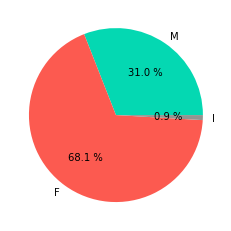

In [56]:
F=sum(df['GENERO']=='F')/df['GENERO'].count()
M=sum(df['GENERO']=='M')/df['GENERO'].count()
I=sum(df['GENERO']=='I')/df['GENERO'].count()
color=('#04D8B2','#FC5A50','#929591')
plt.pie([M,F,I],labels=df['GENERO'].unique(),autopct="%0.1f %%",colors=color)
plt.show()

# Estadisticas por Genero

In [57]:
df.groupby('GENERO').agg({'EDAD':(np.nanmean,np.max,np.min),
                          'ARTICULOS_BEBES':(np.nanmean,np.max,np.min,np.nanstd),
                          'MONTO_BEBES':(np.nanmean,np.max,np.min,np.nanstd),
                          'ARTICULOS_OTROS':(np.nanmean,np.max,np.min,np.nanstd),
                          'MONTO_OTROS':(np.nanmean,np.max,np.min,np.nanstd),
                          'Q1':(np.nanmean,np.max,np.min),
                          'Q2':(np.nanmean,np.max,np.min),
                          'Q3':(np.nanmean,np.max,np.min)
                          }).transpose()
                    

GENERO                              F            I             M
EDAD            nanmean     43.816733    42.857143     44.900000
                amax        83.000000    71.000000     82.000000
                amin        19.000000    28.000000     24.000000
ARTICULOS_BEBES nanmean      3.452611     3.571429      6.051064
                amax        42.000000    10.000000     36.000000
                amin         1.000000     1.000000      1.000000
                nanstd       4.116070     3.552330      6.753722
MONTO_BEBES     nanmean    455.286460   455.172857    807.724809
                amax      3623.620000  1237.470000   4846.880000
                amin        47.400000   134.250000     55.200000
                nanstd     476.896520   430.931821    861.722989
ARTICULOS_OTROS nanmean      5.284333     4.571429      8.961702
                amax        58.000000    16.000000     66.000000
                amin         0.000000     0.000000      0.000000
                nanstd       6.691601     5.912054     10.706787
MONTO_OTROS     nanmean   1194.817776   939.398571   2060.070170
                amax     13635.890000  3425.170000  14909.410000
                amin         0.000000     0.000000      0.000000
                nanstd    1661.717236  1252.651947   2545.963123
Q1              nanmean      2.088975     3.000000      2.868085
                amax        48.000000    21.000000     30.000000
                amin         0.000000     0.000000      0.000000
Q2              nanmean      4.502901     4.285714      8.497872
                amax        60.000000    11.000000     72.000000
                amin         0.000000     0.000000      0.000000
Q3              nanmean      2.145068     0.857143      3.646809
                amax        43.000000     5.000000     50.000000
                amin         0.000000     0.000000      0.000000

# Graficos Estadisticos

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


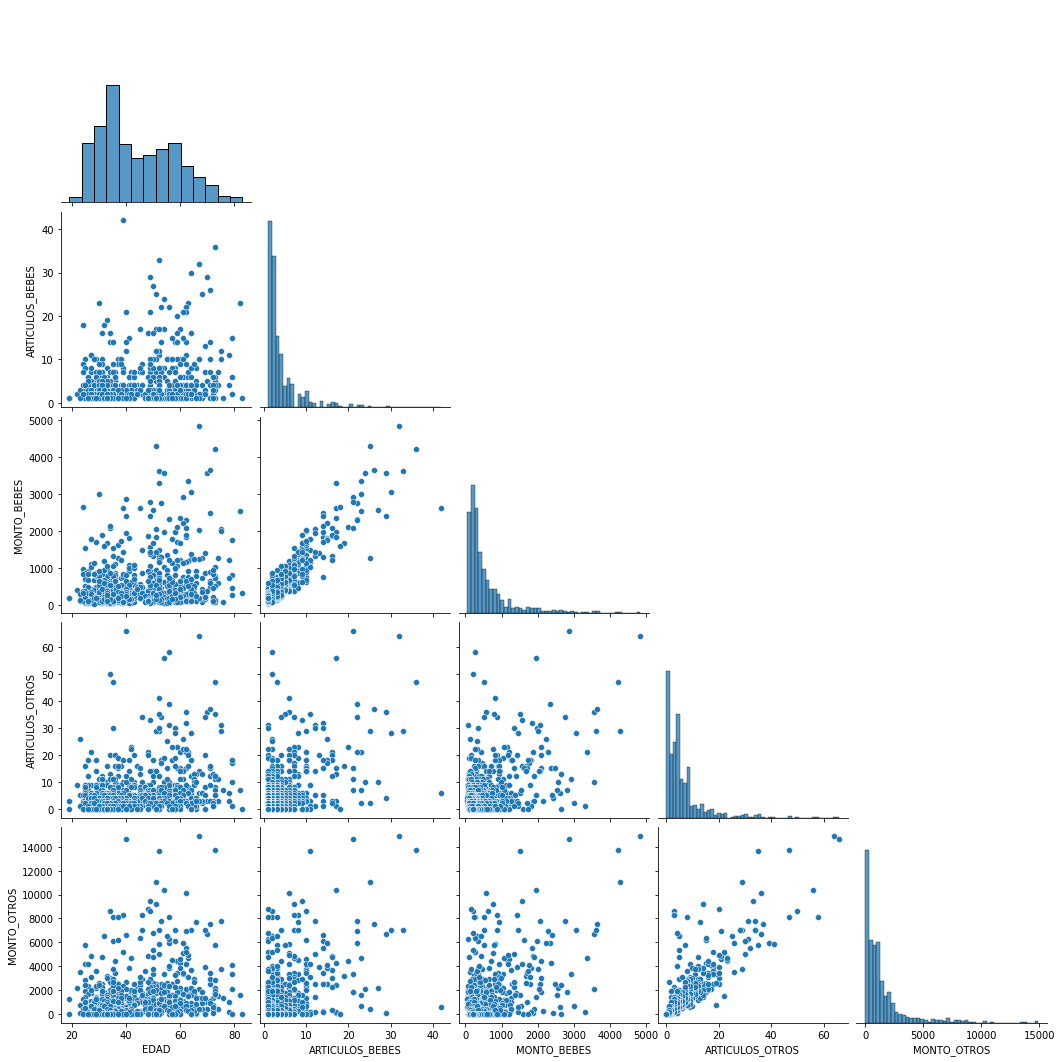

In [58]:
sns.pairplot(df[['EDAD','ARTICULOS_BEBES','MONTO_BEBES','ARTICULOS_OTROS','MONTO_OTROS']], diag_kind="hist",size=3,corner=True)